In [3]:
import pandas as pd
import plotly.express as px
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/raw/Bank Customer Churn Prediction.csv")

In [7]:
print("Columnas ")
print(df.dtypes)

Columnas 
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [8]:
display(df.head())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Se tienen distintas columnas asociadas a la perdida de clientes bancarios, en este dataset se tienen columnas como país, edad, genero, numero de productos bancarios, tarjetas de credito, si es miembro activo, salario estimado y balance de las cuentas para predecir que tan probable es que decistan

In [9]:
duplicados = df[df['customer_id'].duplicated()]
print("duplicados: " ,len(duplicados))

duplicados:  0


No se encontraron duplicados dentro del ID


In [10]:
df['country'] = df['country'].astype(str).str.strip().str.title()
#conteo por pais
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="country",
    hover_name="country",
    hover_data={"count": True, "country": False}, 
    title="Usuarios de banca por país",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(marker_line_color="black", marker_line_width=1)

fig.update_geos(
    projection_type="natural earth",
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="#FAF1F1",   
    showocean=True,
    oceancolor="#DCF0FF",
    showframe=False
)
fig.update_geos(fitbounds="locations")
fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    legend_title_text="País"
)
fig.show()

C:\Users\DiDi\AppData\Local\Temp\ipykernel_26732\2831741501.py:6: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


Los 3 países de los cuales se tiene data son España (2477 usuarios), Francia(5014 usuarios) y Alemania (2509 usuarios).

Se realizaron histogramas para entender la distribución de las variables númericas y gráficos de barra para entender la frecuencia de las variables categóricas.

C:\Users\crist\AppData\Local\Temp\ipykernel_18120\2403466757.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\crist\AppData\Local\Temp\ipykernel_18120\2403466757.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



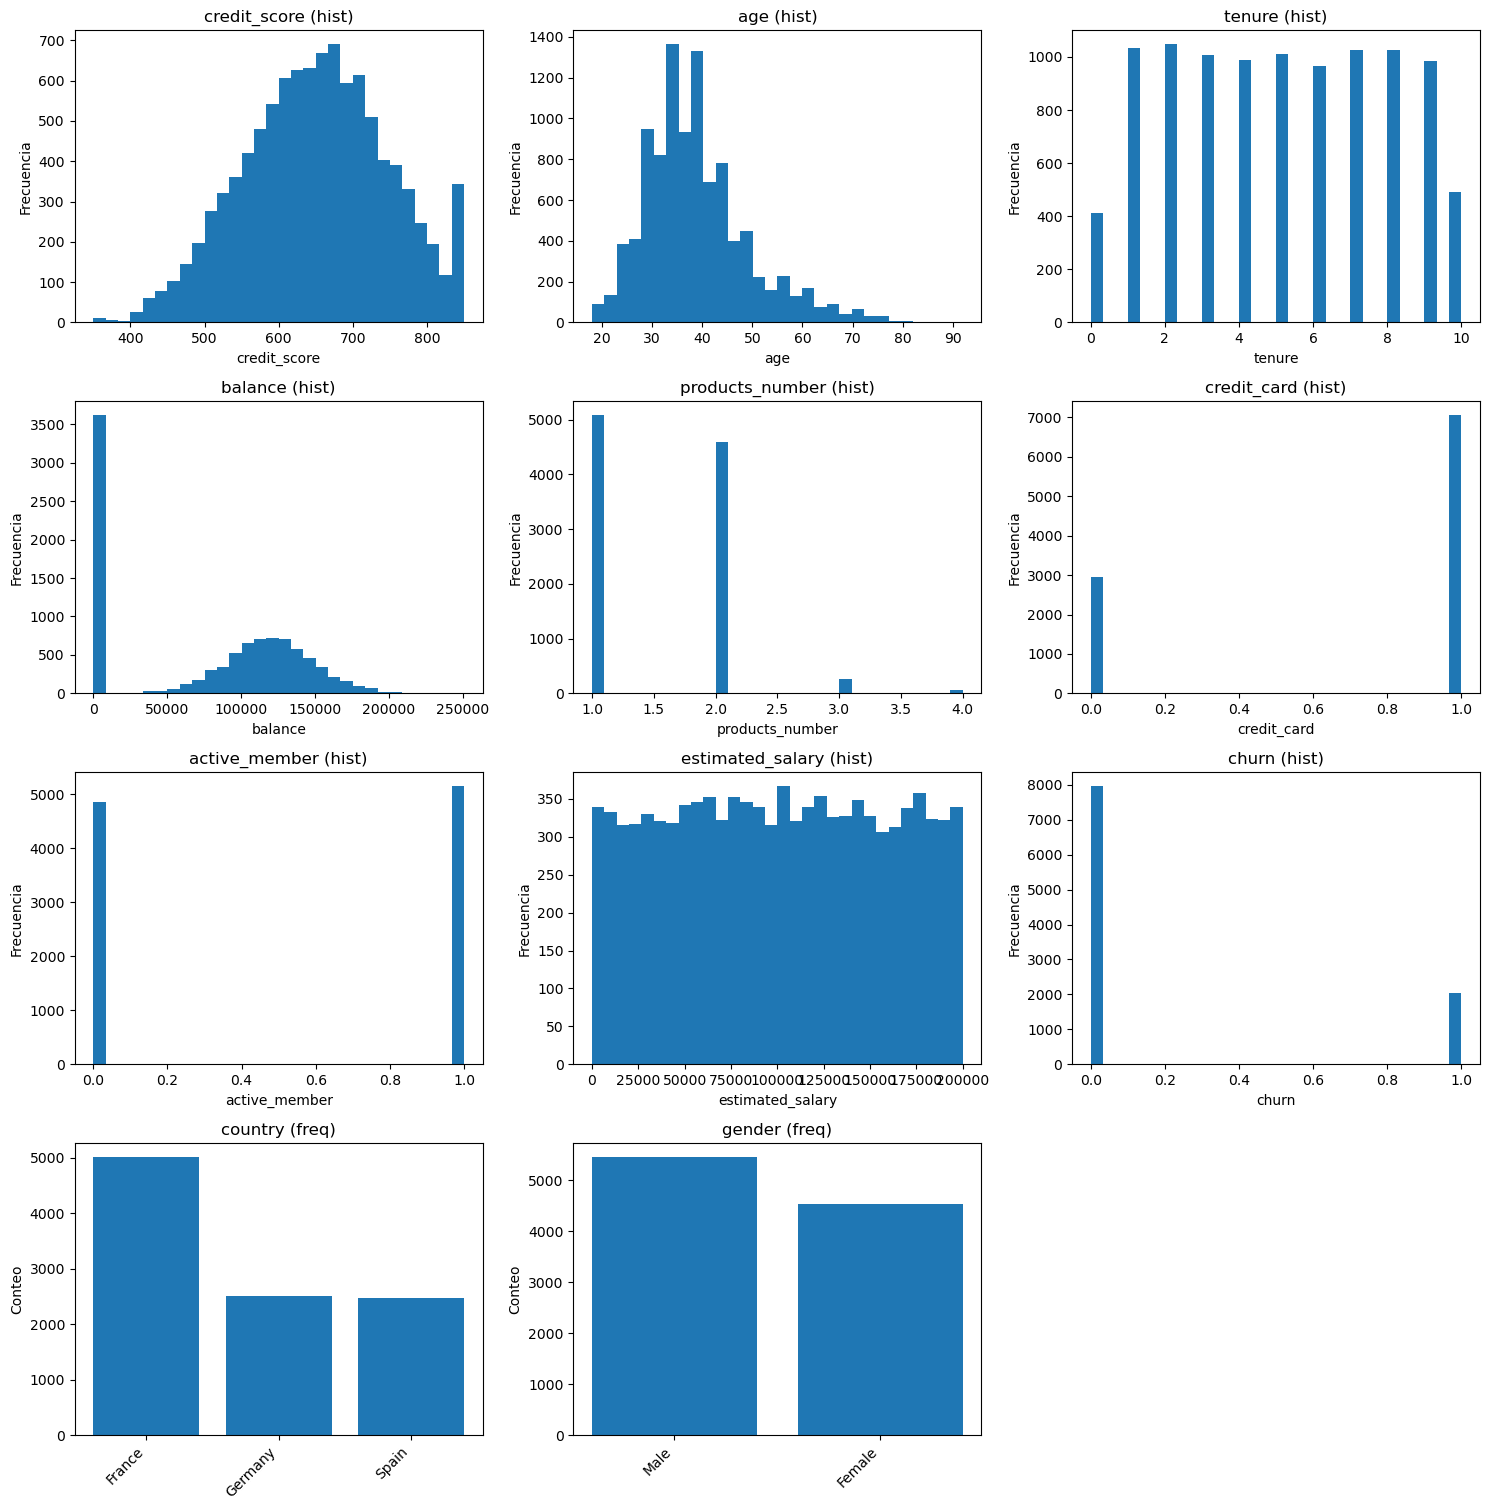

In [7]:
cols = [c for c in df.columns if not c.lower().endswith("id")]

#Separar columnas por tipo de variables
numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
catbool_cols = [c for c in cols if c not in numeric_cols]

#Función para graficar histogramas en una grilla
def plot_grid_all(df, numeric_cols, catbool_cols, bins=30, max_cat=30):
    all_cols = numeric_cols + catbool_cols
    n = len(all_cols)
    if n == 0:
        print("No hay columnas para graficar.")
        return
    
    #Definir grilla
    ncols = 3
    nrows = math.ceil(n / ncols)
    plt.figure(figsize=(ncols*5, nrows*3.8))

    for i, col in enumerate(all_cols, start=1):
        ax = plt.subplot(nrows, ncols, i)
        s = df[col].dropna()

        if col in numeric_cols:
            #Histograma para numéricas
            ax.hist(s, bins=bins)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")
            ax.set_title(f"{col} (hist)")
        else:
            #Barras para categóricas/booleanas
            vc = s.astype(str).value_counts().sort_values(ascending=False)
            if len(vc) > max_cat:
                vc = vc.head(max_cat)
            ax.bar(vc.index, vc.values)
            ax.set_xticklabels(vc.index, rotation=45, ha='right')
            ax.set_ylabel("Conteo")
            ax.set_title(f"{col} (freq)")
    
    plt.tight_layout()
    plt.show()

plot_grid_all(df, numeric_cols, catbool_cols, bins=30, max_cat=30)

El análisis de las distribuciones muestra que la mayoría de los clientes presenta un puntaje crediticio medio y edades comprendidas entre los 30 y 45 años, lo que refleja una base de usuarios con perfiles financieros estables y activos. Los saldos se concentran en rangos intermedios, mientras que la permanencia en el banco (tenure) se distribuye de forma uniforme, sin predominio de un grupo específico. Además, la mayor parte de los clientes posee uno o dos productos contratados, lo que sugiere un nivel moderado de vinculación.

Se observa también una proporción importante de clientes inactivos, lo que podría estar relacionado con el abandono de la entidad. La variable de salario estimado presenta una distribución que parece ser uniforme, mientras que la variable objetivo (churn) evidencia un marcado desbalance, con una mayoría de clientes que permanecen en el banco (lo que podría generar problemas a la hora de hacer las estimaciones). Estos patrones generales permiten identificar características comunes entre los usuarios y posibles factores asociados al riesgo de abandono, información clave para el modelado predictivo posterior.

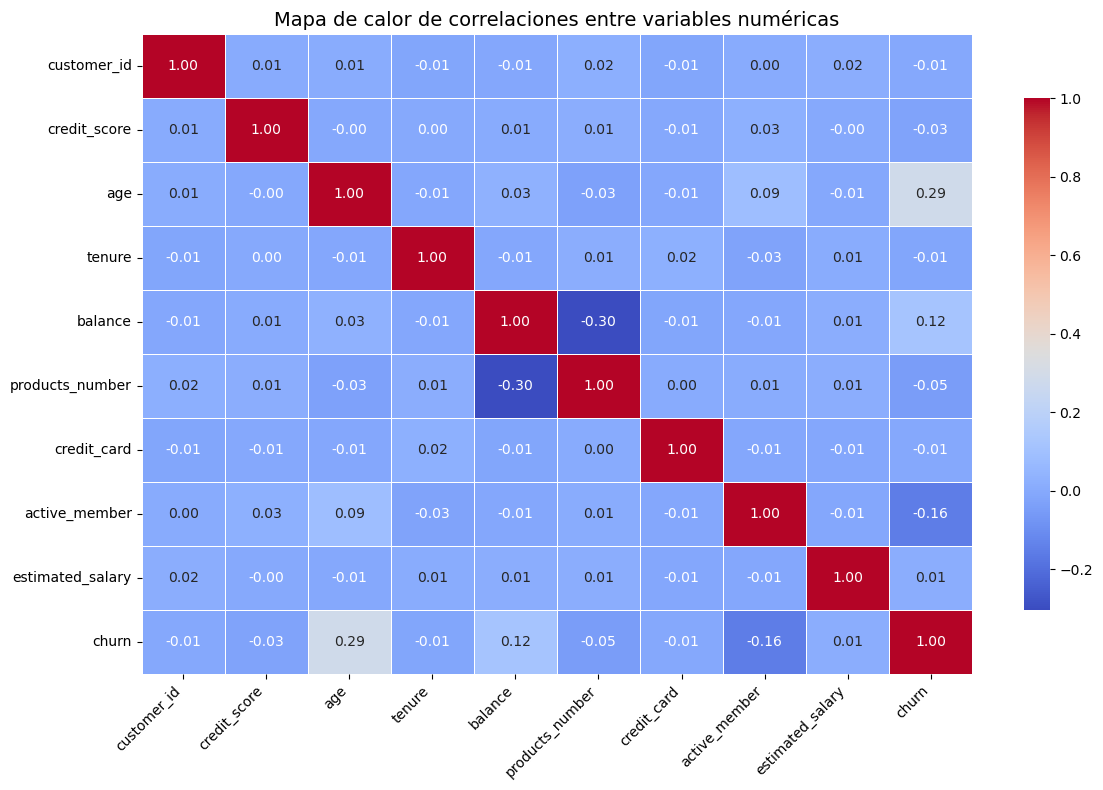

|corr|
var1            var2                   
products_number balance        0.304180
churn           age            0.285323
                active_member  0.156128
balance         churn          0.118533
age             active_member  0.085472
products_number churn          0.047820
                age            0.030680
active_member   tenure         0.028362
age             balance        0.028308
churn           credit_score   0.027094

In [8]:
# Análisis de correlación entre variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Seleccionar únicamente variables numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Validación rápida
if numeric_df.shape[1] < 2:
    raise ValueError("No hay suficientes columnas numéricas para calcular correlaciones.")

# Calcular la matriz de correlación (Pearson)
corr_matrix = numeric_df.corr()

# Visualización: heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Top correlaciones en valor absoluto (excluyendo la diagonal)
corr_pairs = (
    corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))  # quita diagonal
    .abs()
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)

# Muestra las 10 correlaciones más altas
top_corr = corr_pairs.drop_duplicates().head(10)
display(pd.DataFrame(top_corr, columns=["|corr|"]).rename_axis(["var1", "var2"]))

Análisis de correlaciones 

El mapa de calor muestra las relaciones lineales entre las variables numéricas del conjunto de datos.  
Además, la tabla complementaria presenta las diez correlaciones más altas en valor absoluto.

Se observa que la mayor correlación (0.30) se da entre balance y products_number, lo que sugiere que los clientes con más productos tienden a manejar saldos más altos.  
También destaca la relación entre age y churn (0.28), indicando que la edad podría influir de manera importante en la probabilidad de abandono: clientes de mayor edad presentan una ligera tendencia a quedarse más tiempo con el banco.  
Asimismo, churn muestra correlaciones moderadas con active_member (0.16) y balance (0.11), lo que sugiere que los clientes más activos y con mayores balances son menos propensos a abandonar.  

Las correlaciones restantes son bajas, lo que indica que la mayoría de las variables numéricas aportan información complementaria, sin redundancias fuertes.  
Estos hallazgos permiten priorizar variables como edad, balance, número de productos y estado activo en los modelos de predicción de abandono de clientes.

#### Analisis de la variable objetivo

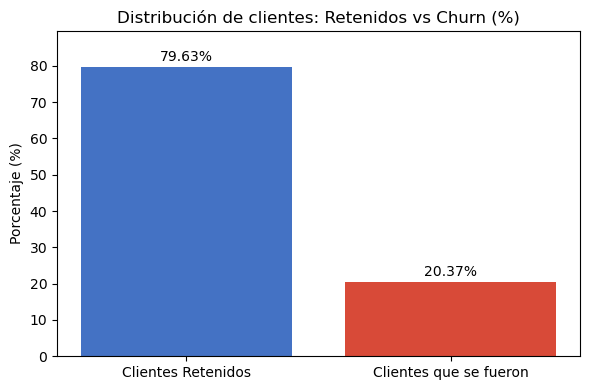

In [9]:
# Verificar conteo
churn_counts = df['churn'].value_counts(normalize=True) * 100

# Asignar los valores según etiquetas
labels = ['Clientes Retenidos', 'Clientes que se fueron']
values = churn_counts.loc[[0, 1]].values  
plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=['#4472C4', '#D84A38'])
plt.ylabel("Porcentaje (%)")
plt.title("Distribución de clientes: Retenidos vs Churn (%)")

# Mostrar porcentaje sobre cada barra
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(values) + 10)
plt.tight_layout()
plt.show()


Este gráfico muestra la proporción de clientes que se mantuvieron activos frente a aquellos que abandonaron el banco. Se observa que aproximadamente el 79.6 % de los clientes fueron retenidos, mientras que el 20.4 % se dieron de baja. Este comportamiento indica un desbalance en la variable objetivo, lo cual es común en problemas de churn, y debe ser considerado en las etapas posteriores del modelado, especialmente en la selección de métricas y técnicas de balanceo. El porcentaje de abandono no es despreciable y representa un segmento importante para análisis estratégico por parte del negocio.

##### Análisis de las variables categoricas vs la variable objetivo

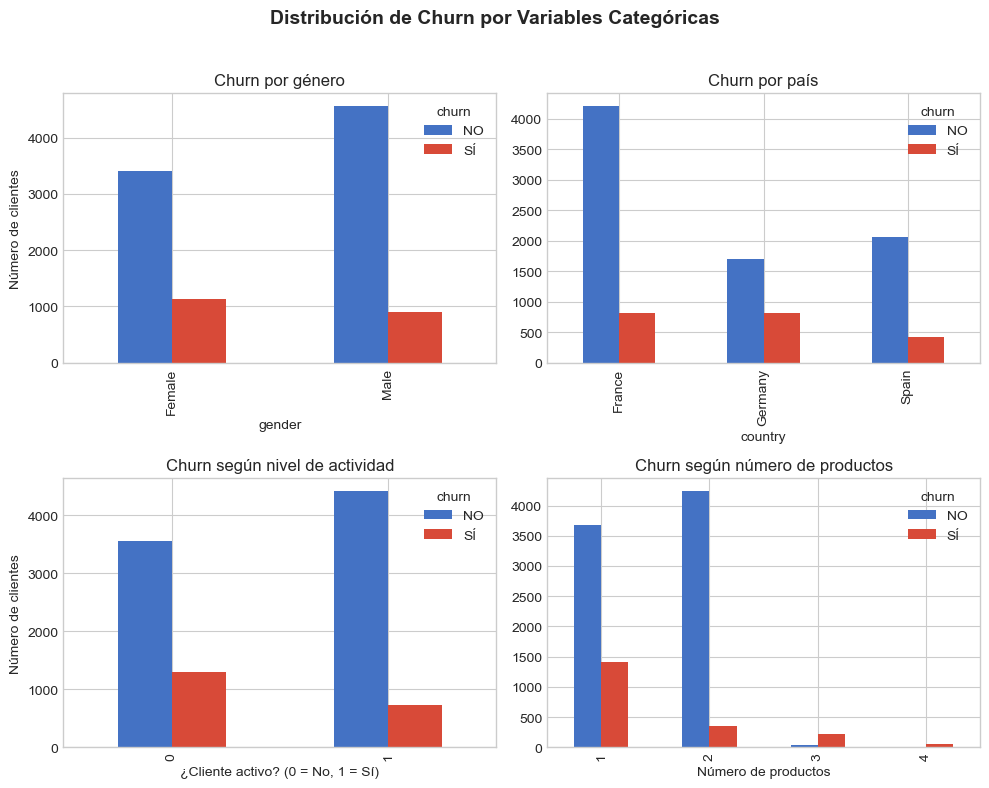

In [10]:

# Copia del dataframe con churn como texto
df_viz = df.copy()
df_viz['churn'] = df_viz['churn'].map({0: 'NO', 1: 'SÍ'})

# Configuración general
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribución de Churn por Variables Categóricas', fontsize=14, fontweight='bold')

# 1 Género
df_viz.groupby(['gender', 'churn']).size().unstack().plot(
    kind='bar', ax=axes[0,0], color=['#4472C4', '#D84A38'])
axes[0,0].set_title('Churn por género')
axes[0,0].set_ylabel('Número de clientes')

# 2 País
df_viz.groupby(['country', 'churn']).size().unstack().plot(
    kind='bar', ax=axes[0,1], color=['#4472C4', '#D84A38'])
axes[0,1].set_title('Churn por país')
axes[0,1].set_ylabel('')

# 3 Actividad del cliente
df_viz.groupby(['active_member', 'churn']).size().unstack().plot(
    kind='bar', ax=axes[1,0], color=['#4472C4', '#D84A38'])
axes[1,0].set_title('Churn según nivel de actividad')
axes[1,0].set_xlabel('¿Cliente activo? (0 = No, 1 = Sí)')
axes[1,0].set_ylabel('Número de clientes')

# 4 Número de productos
df_viz.groupby(['products_number', 'churn']).size().unstack().plot(
    kind='bar', ax=axes[1,1], color=['#4472C4', '#D84A38'])
axes[1,1].set_title('Churn según número de productos')
axes[1,1].set_xlabel('Número de productos')
axes[1,1].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Los gráficos muestran cómo varía la proporción de abandono de clientes (churn) en función de diferentes variables categóricas. En cuanto al género, las mujeres presentan una mayor proporción de churn que los hombres, aunque ambos grupos tienen una mayoría de clientes retenidos. Por país, se observa que Francia presenta el mayor número de retenidos, mientras que Alemania es un foco de análisis debido a que su proporcion de Churn es más alta que los demás paises.

En la parte inferior, se analiza el churn según el nivel de actividad del cliente y el número de productos contratados. Se evidencia que los clientes inactivos (active_member = 0) tienen una mayor tasa de abandono, lo cual es consistente con comportamientos de desinterés o baja vinculación. En cuanto al número de productos, se destaca que los clientes con un solo producto son los que más se van, mientras que aquellos con 2 productos muestran una mayor retención. Esto sugiere que la multivinculación podría actuar como un factor protector contra el churn, una hipótesis que podría ser explorada en fases posteriores del análisis.

##### Análisis de la varibles númericas vs la variable objetivo

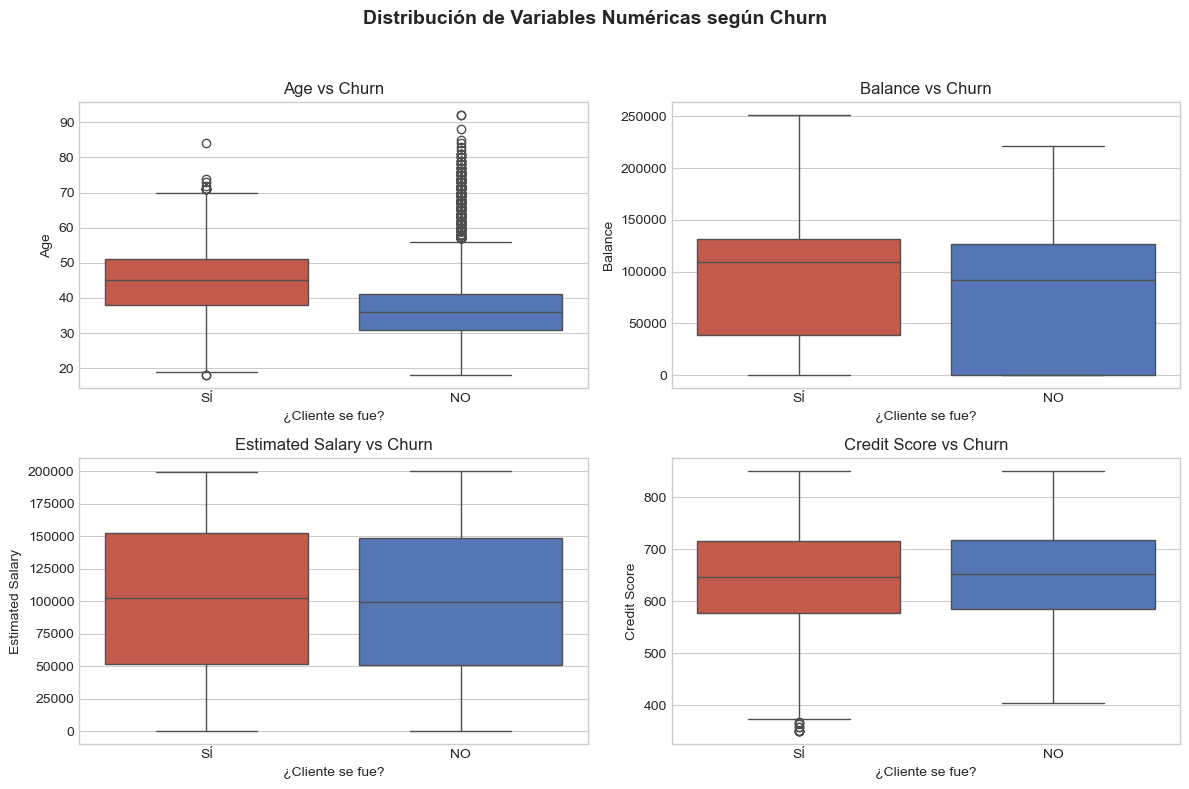

In [11]:

# Mapear churn
df_viz = df.copy()
df_viz['churn'] = df_viz['churn'].map({0: 'NO', 1: 'SÍ'})

# Variables a graficar
num_vars = ['age', 'balance', 'estimated_salary', 'credit_score']

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribución de Variables Numéricas según Churn', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flat, num_vars):
    sns.boxplot(data=df_viz, x='churn', y=col, hue='churn', ax=ax, palette={'NO': '#4472C4', 'SÍ': '#D84A38'}, dodge=False)
    ax.set_title(f'{col.replace("_", " ").title()} vs Churn')
    ax.set_xlabel('¿Cliente se fue?')
    ax.set_ylabel(col.replace("_", " ").title())

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


El análisis de variables numéricas revela diferencias significativas entre clientes que se quedan y aquellos que abandonan. En términos de edad, se observa que los clientes que se fueron tienden a ser mayores, con una mediana cercana a los 45 años, mientras que los clientes retenidos presentan una mediana alrededor de los 35 años. Este comportamiento sugiere que los usuarios de mayor edad podrían estar más propensos a abandonar la entidad.

En cuanto al saldo (balance), los clientes que se fueron presentan una mayor dispersión y un valor ligeramente superior en la mediana, lo cual podría indicar una posible desconexión entre el nivel de recursos y la percepción de valor del servicio bancario. No obstante, esta diferencia no es drástica.

Para el salario estimado (estimated_salary), no se evidencian diferencias relevantes entre los grupos; ambos presentan distribuciones similares, lo que sugiere que el ingreso no es un factor discriminante directo en la decisión de abandono. Finalmente, el puntaje crediticio (credit_score) muestra una leve diferencia: los clientes que se quedaron tienden a tener un puntaje ligeramente más alto, aunque la diferencia es sutil.

Este análisis sugiere que variables como edad y actividad financiera (balance) pueden tener un mayor peso en el comportamiento de churn, mientras que el salario o el crédito no parecen ser determinantes por sí solos.

In [ ]:
df.to_csv("../data/processed/Bank_Customer_Churn.csv", index=False)